In [6]:
# reload external modules automatically if they are changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:

from genDSL_helpers import visualize_board, plot_arc_json
from dungeon_generation_script import generate_09c534e7, generate_full_riddle_09c534e7
from more_generation_scripts import generate_007bbfb7, generate_full_riddle_27a28665
from nlp_data_prep import get_unique_numbers, get_number_not_in_list

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import random
from tqdm import tqdm


################# PARAMETERS TO CHANGE ####################
dataset_folder = r'C:\Users\Acer\.arc\cache\dataset\1000_of_3jammy_riddles'
make_sub_folders = True # make a subfolder for each riddle type
verbose = False # extra print statements
#generator_function = generate_09c534e7 # dungeon
#generator_function = generate_27a28665 # from more_generation_scripts.py
#generator_function = generate_007bbfb7 # from more_generation_scripts.py - fractal/recursive

generator_functions = [generate_09c534e7, generate_007bbfb7] # riddles in which the function does not relate to other i/o pairs in the riddle
full_riddle_generator_functions = [generate_full_riddle_27a28665] # riddles in which the function relates to other i/o pairs in the riddle
#total number of puzzles (meta samples)
dataset_size = 1000

#number of training boards and testing boards
meta_trn_size_min = 2
meta_trn_size_max = 7
meta_tst_size     = 1 

items_to_plot = 10 # for each type of riddle, plot this many examples

Generating dataset for generator function:  generate_09c534e7


Generating dataset:   0%|          | 0/10 [00:00<?, ?it/s]

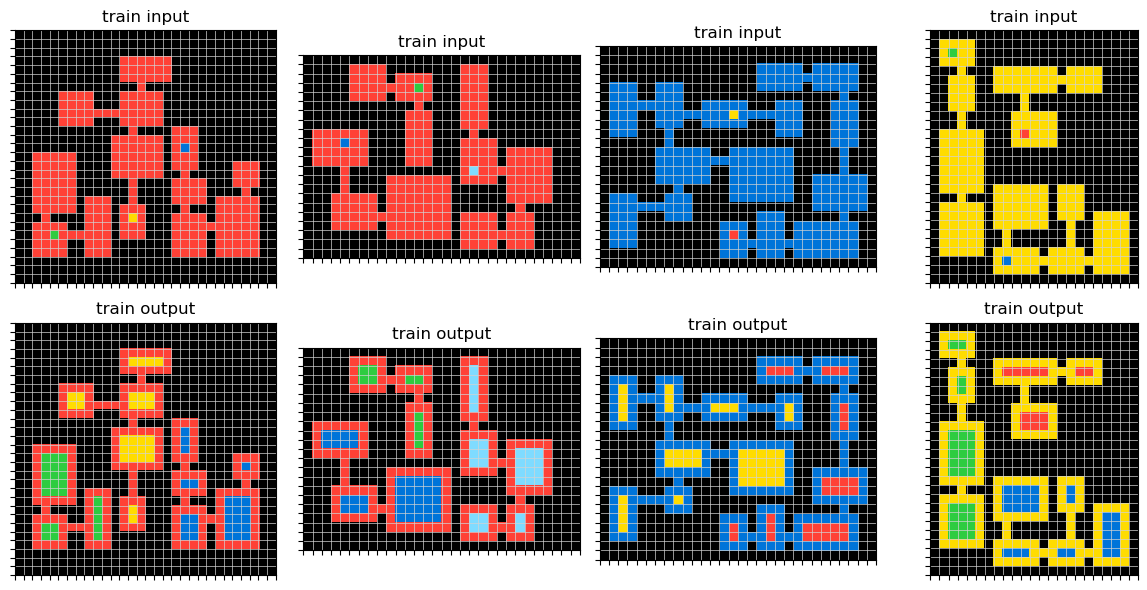

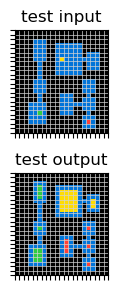

Generating dataset:  20%|██        | 2/10 [00:02<00:08,  1.07s/it]

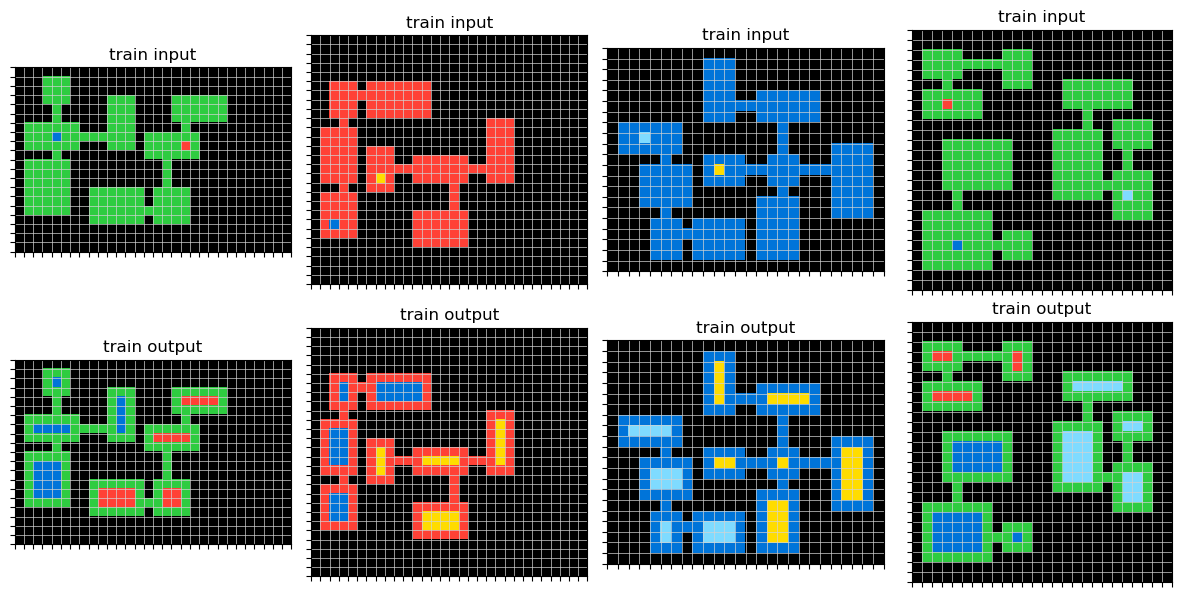

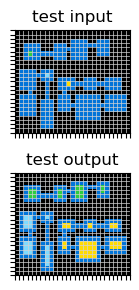

Generating dataset:  30%|███       | 3/10 [00:04<00:10,  1.49s/it]

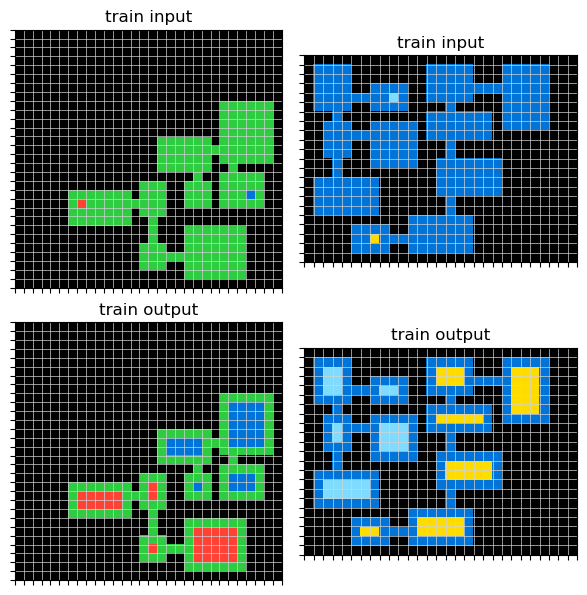

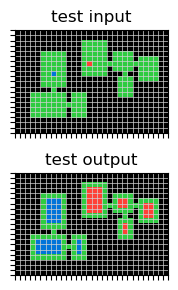

Generating dataset:  40%|████      | 4/10 [00:05<00:08,  1.46s/it]

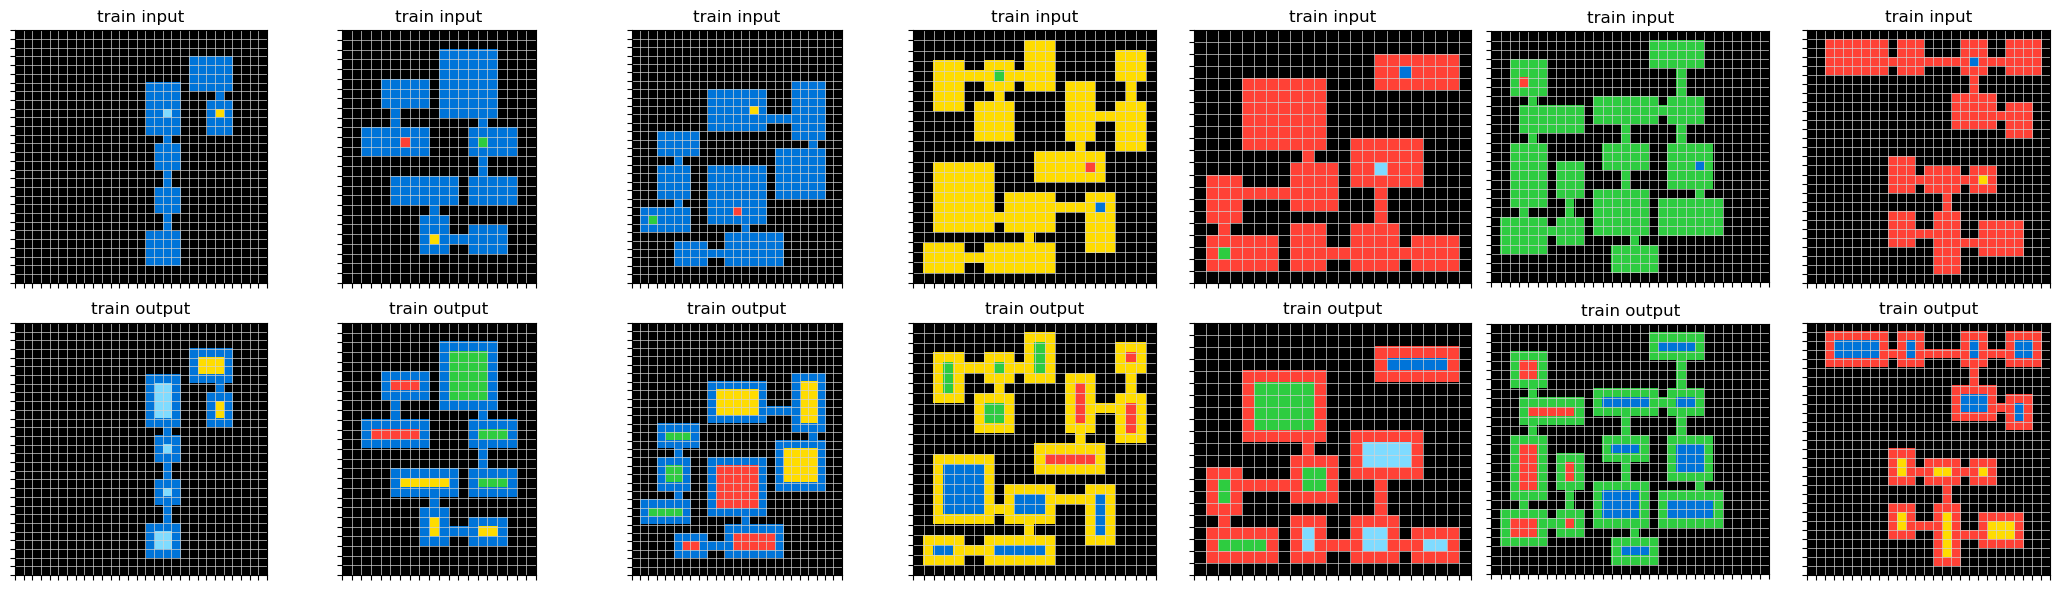

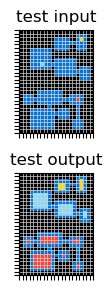

Generating dataset:  50%|█████     | 5/10 [00:08<00:10,  2.09s/it]

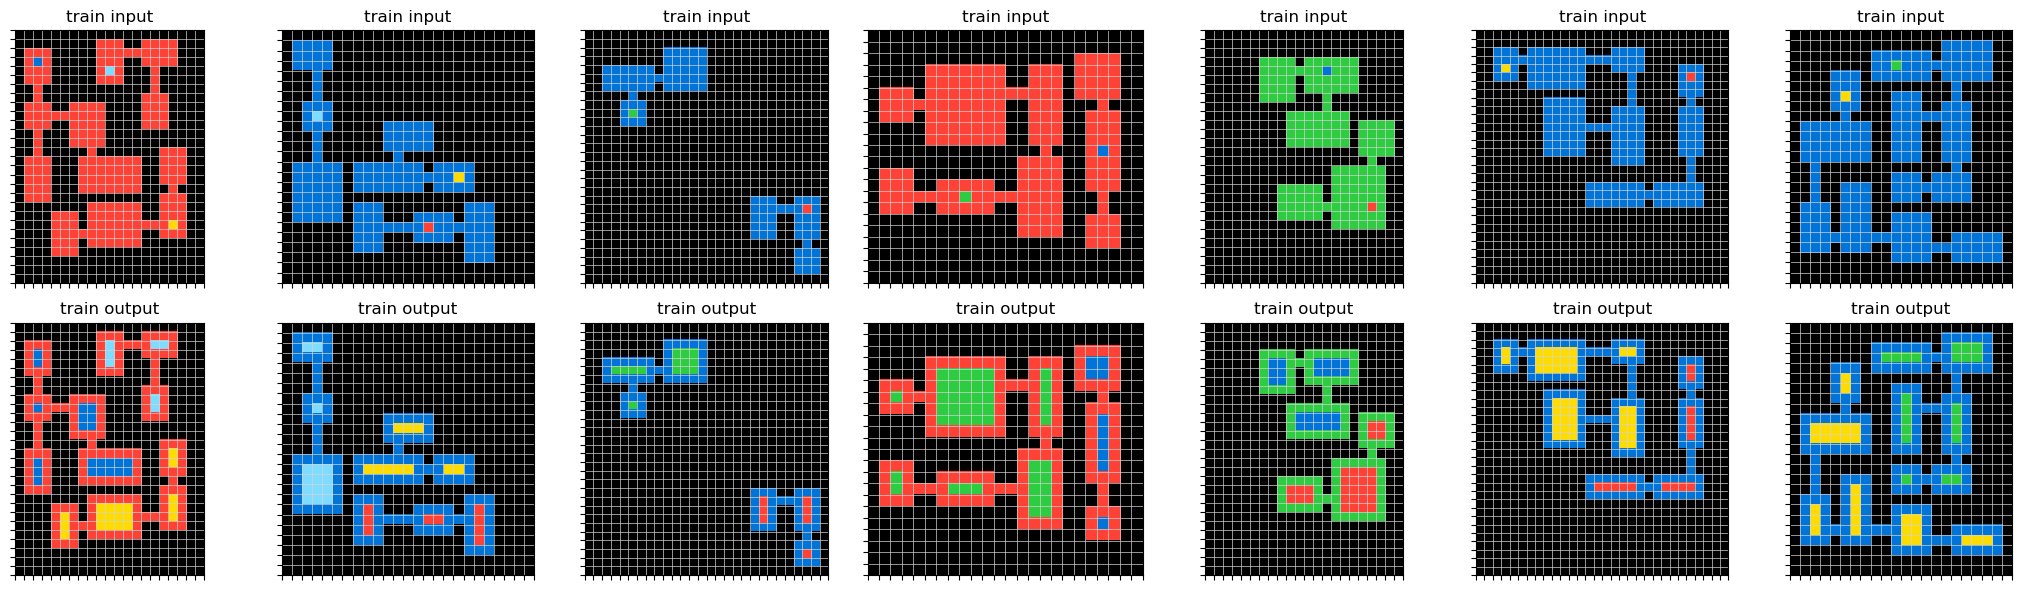

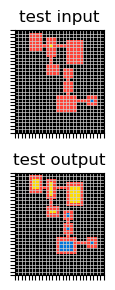

Generating dataset:  60%|██████    | 6/10 [00:12<00:10,  2.51s/it]

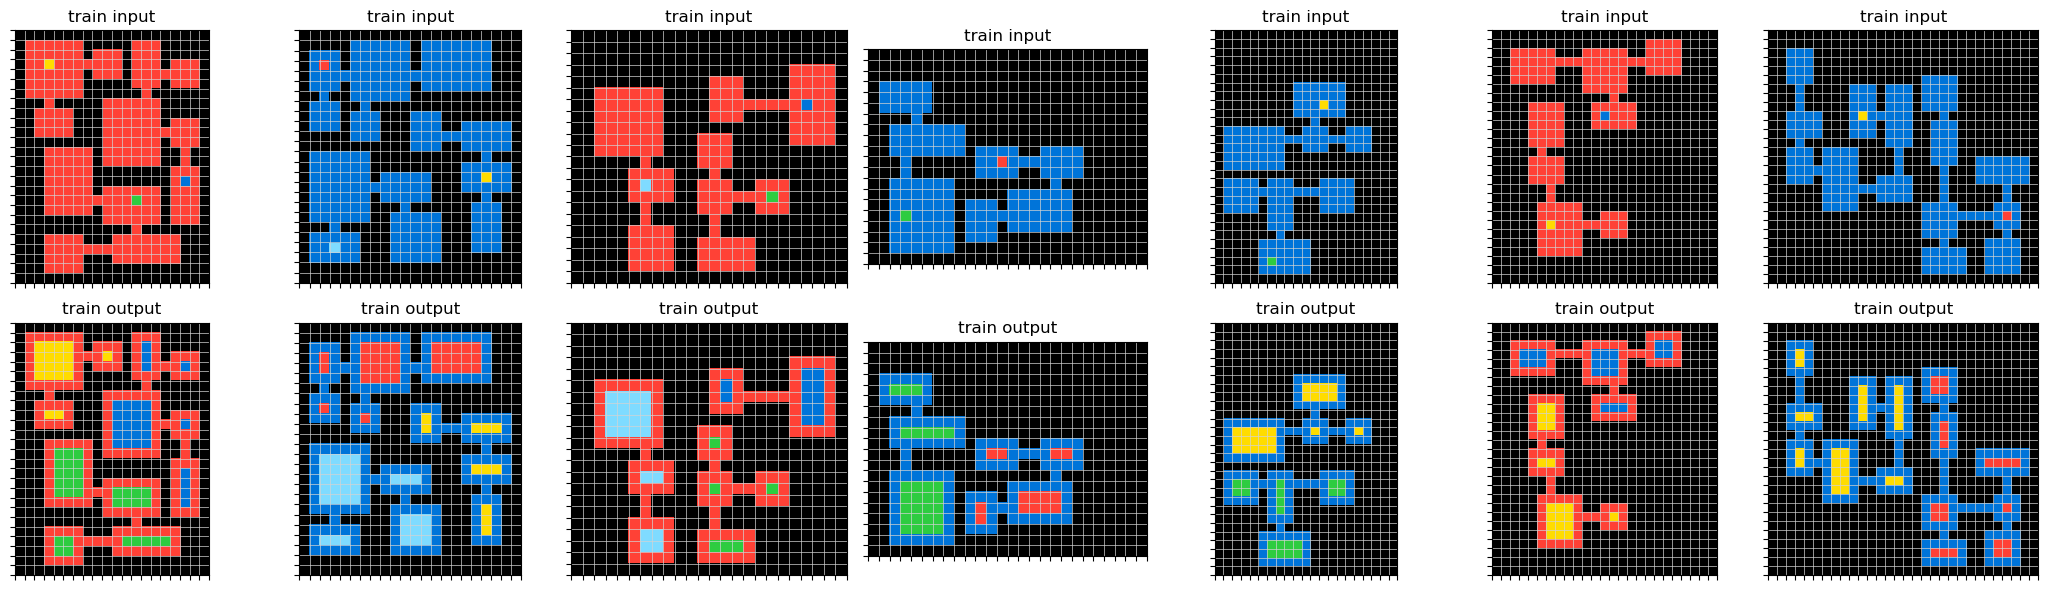

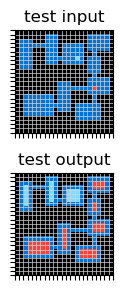

Generating dataset:  70%|███████   | 7/10 [00:15<00:08,  2.68s/it]

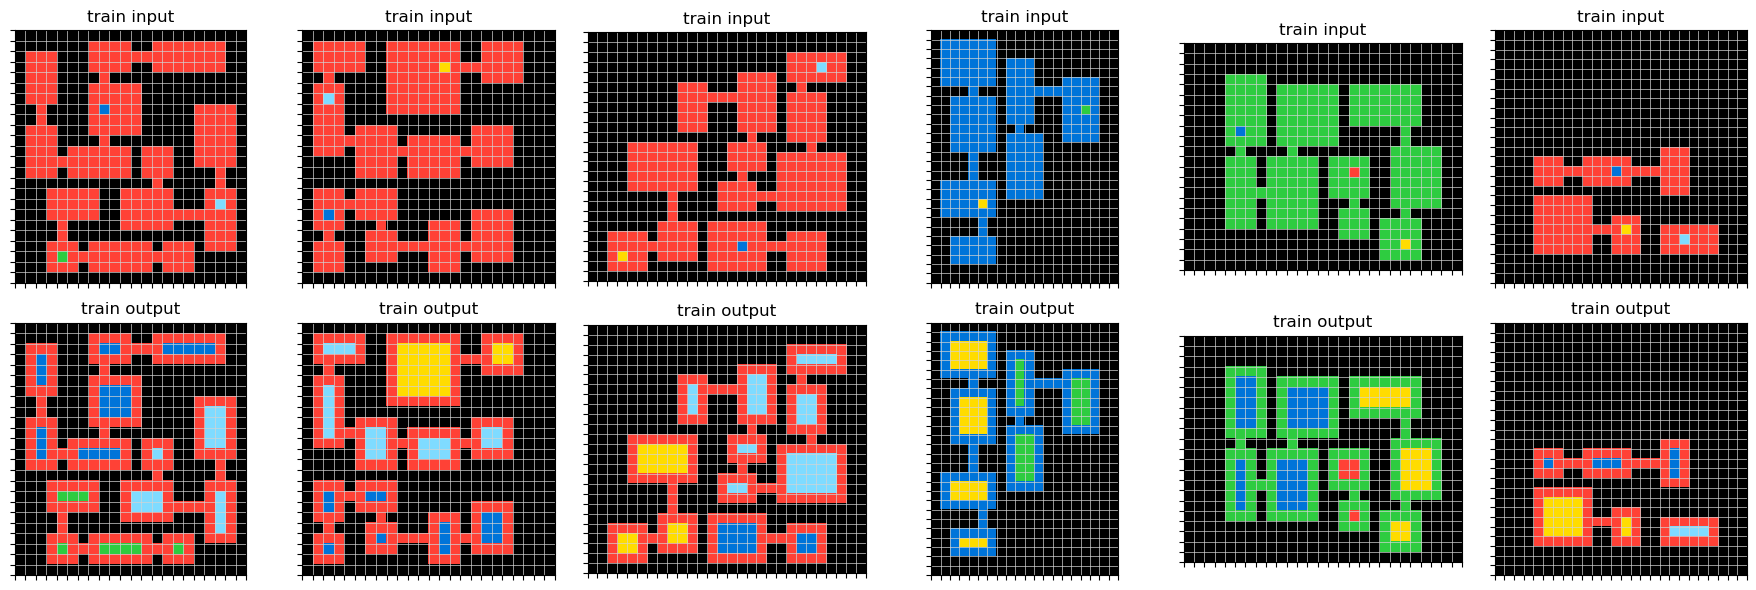

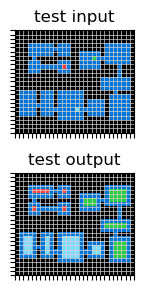

Generating dataset:  80%|████████  | 8/10 [00:18<00:05,  2.74s/it]

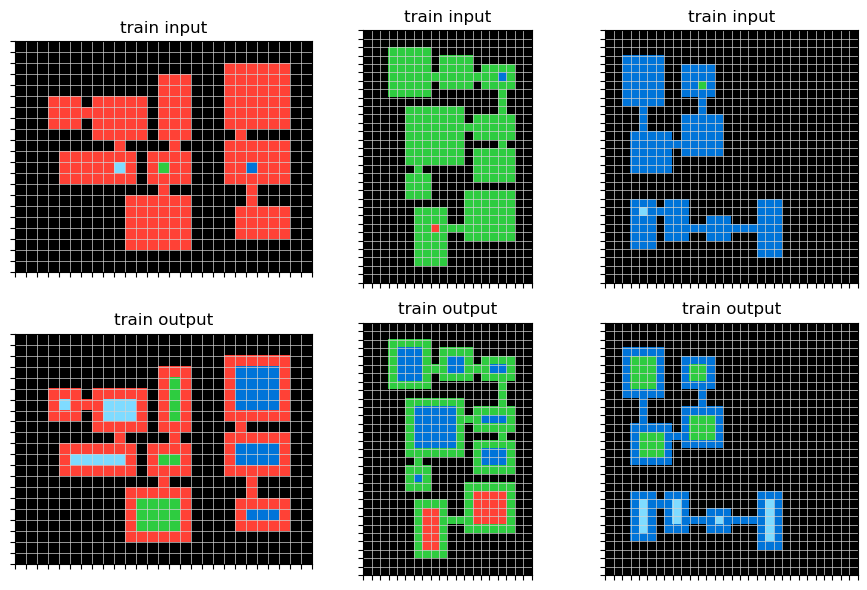

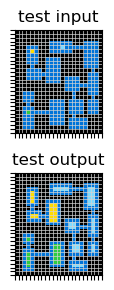

Generating dataset:  90%|█████████ | 9/10 [00:19<00:02,  2.43s/it]

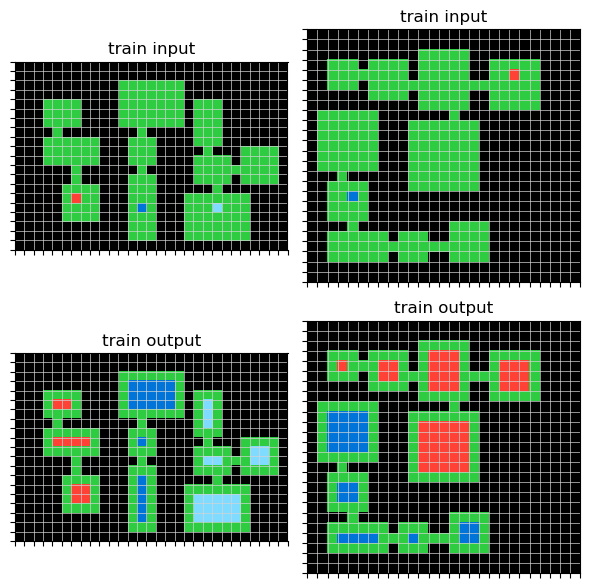

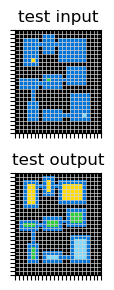

Generating dataset: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]

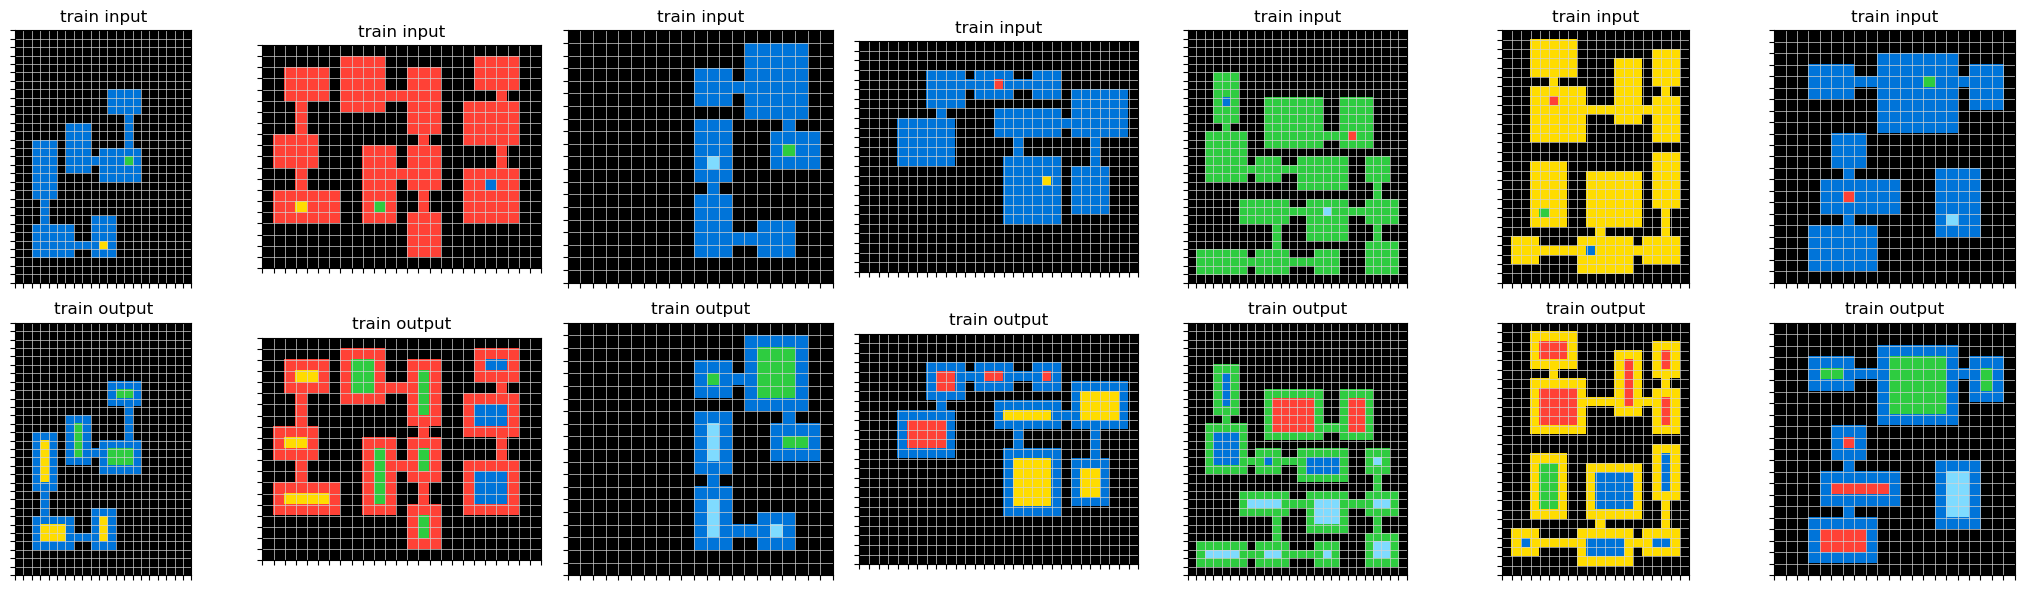

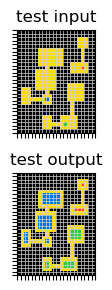

Generating dataset for generator function:  generate_007bbfb7


Generating dataset: 100%|██████████| 10/10 [00:24<00:00,  2.45s/it]


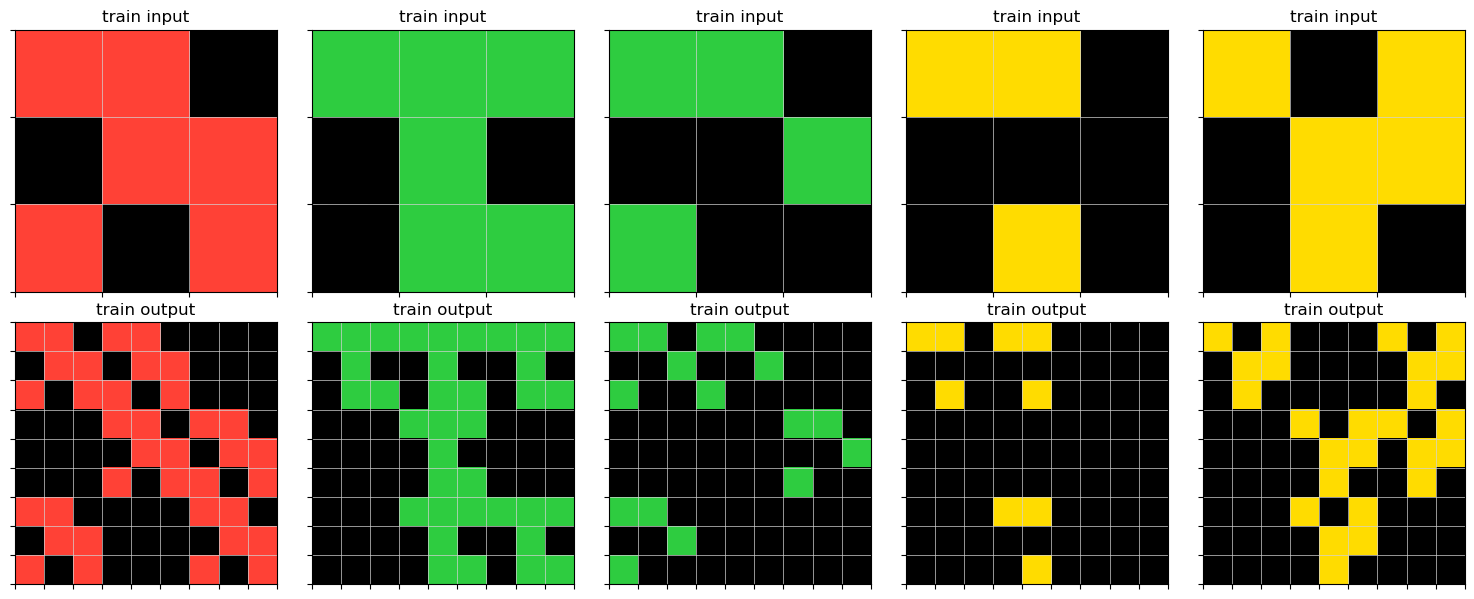

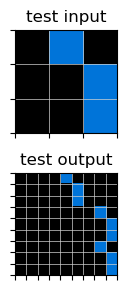

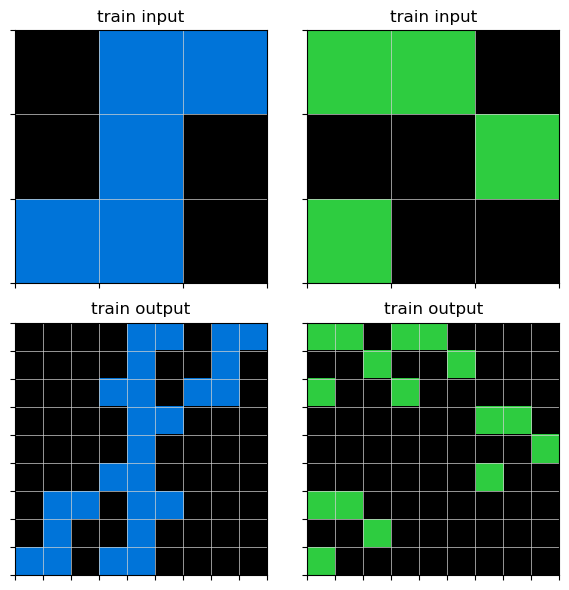

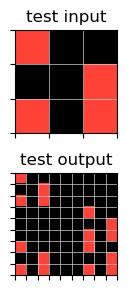

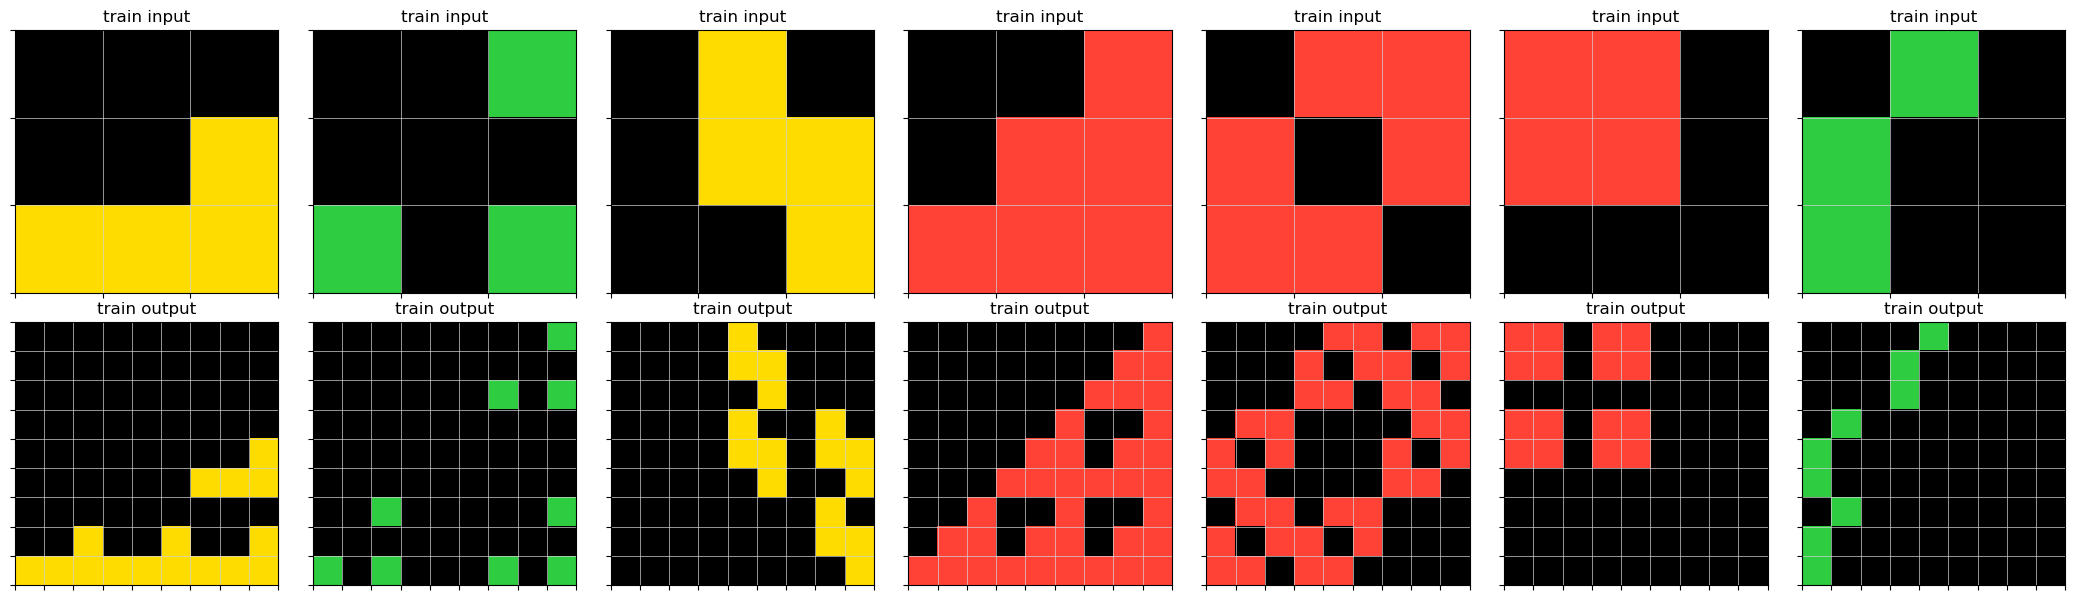

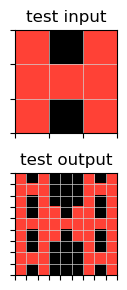

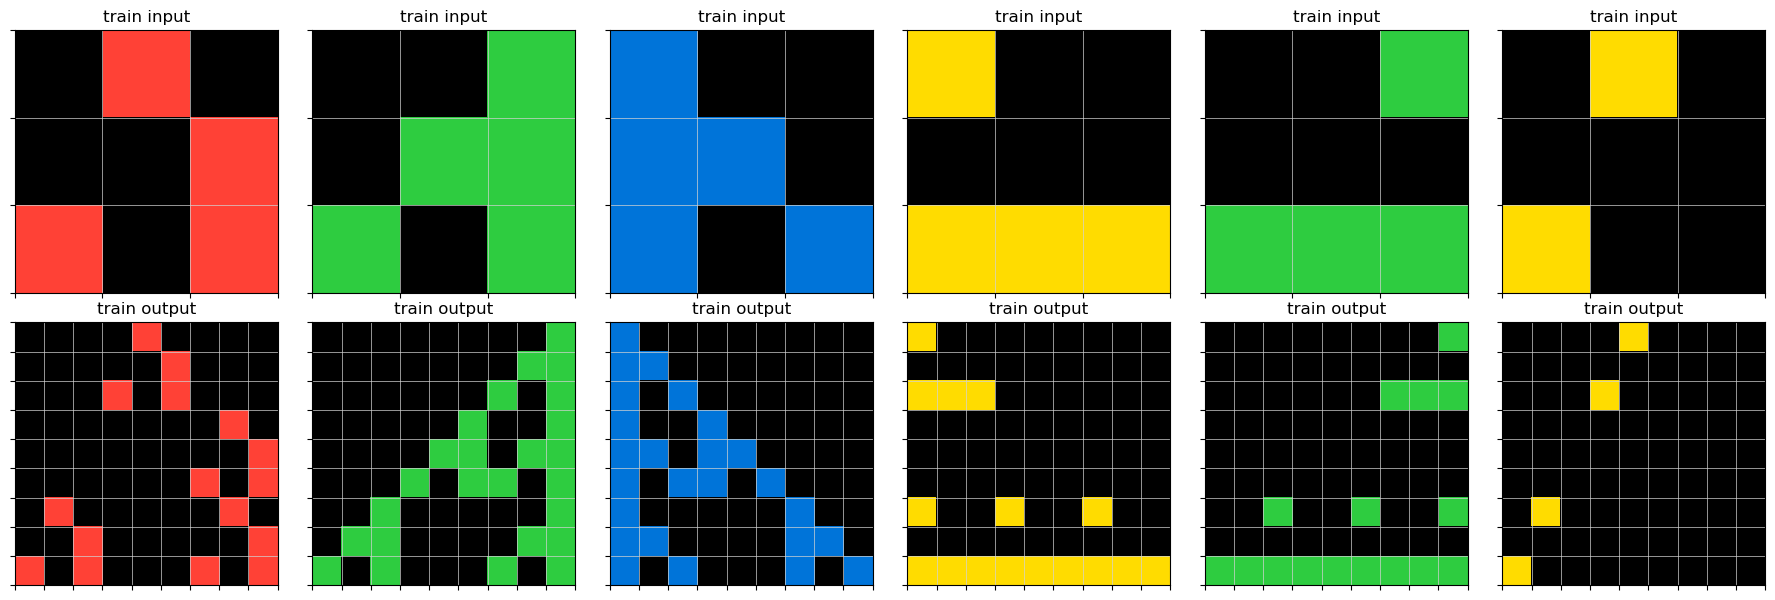

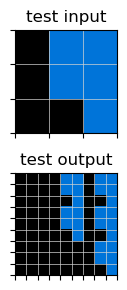

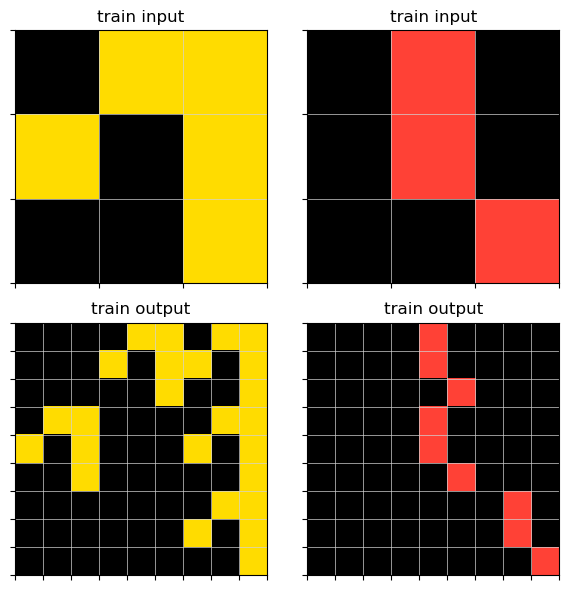

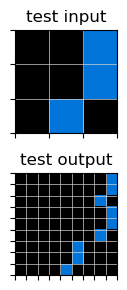

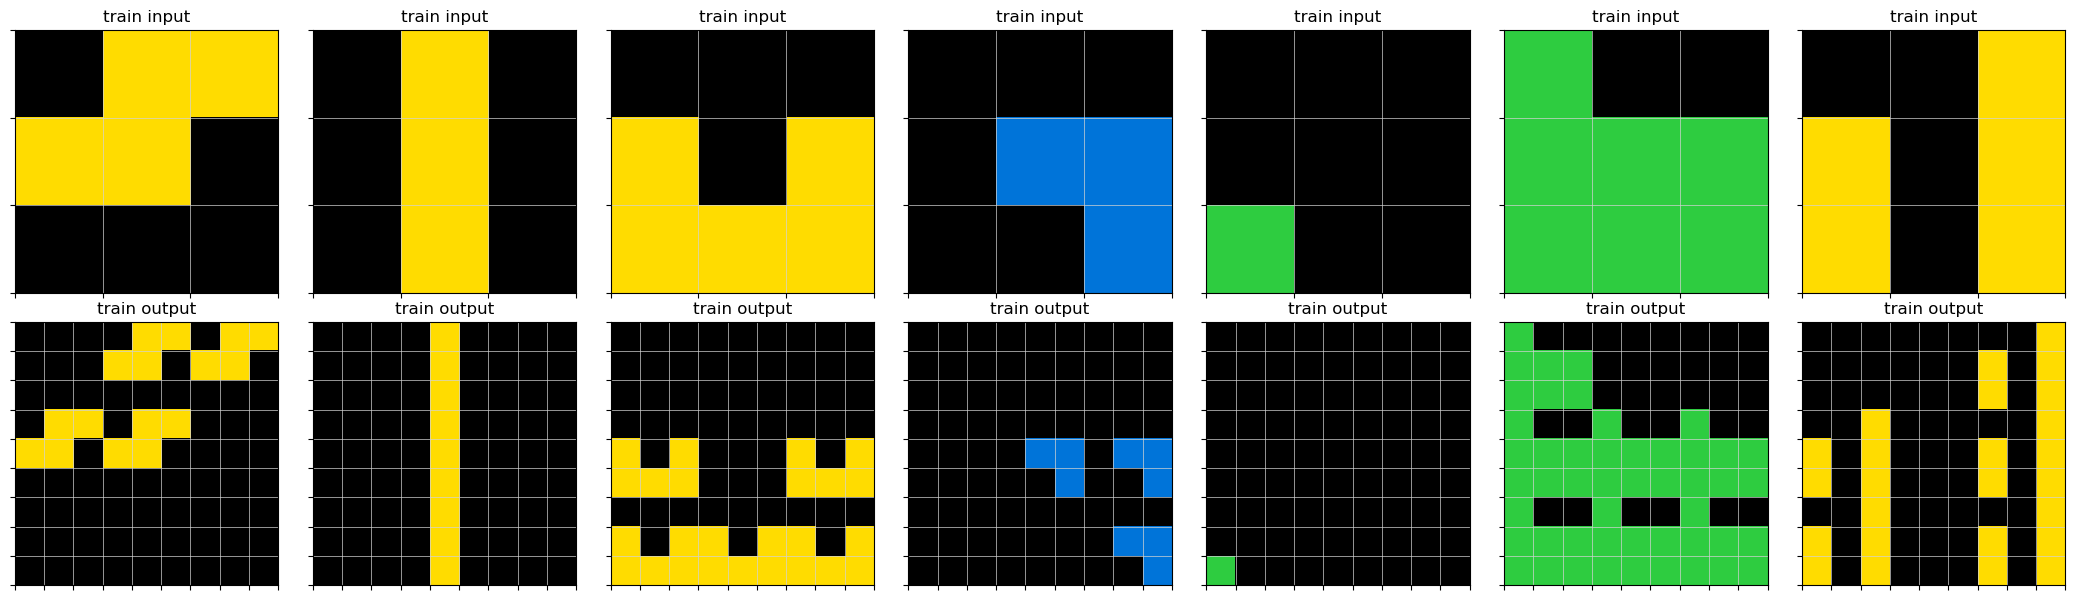

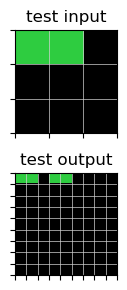

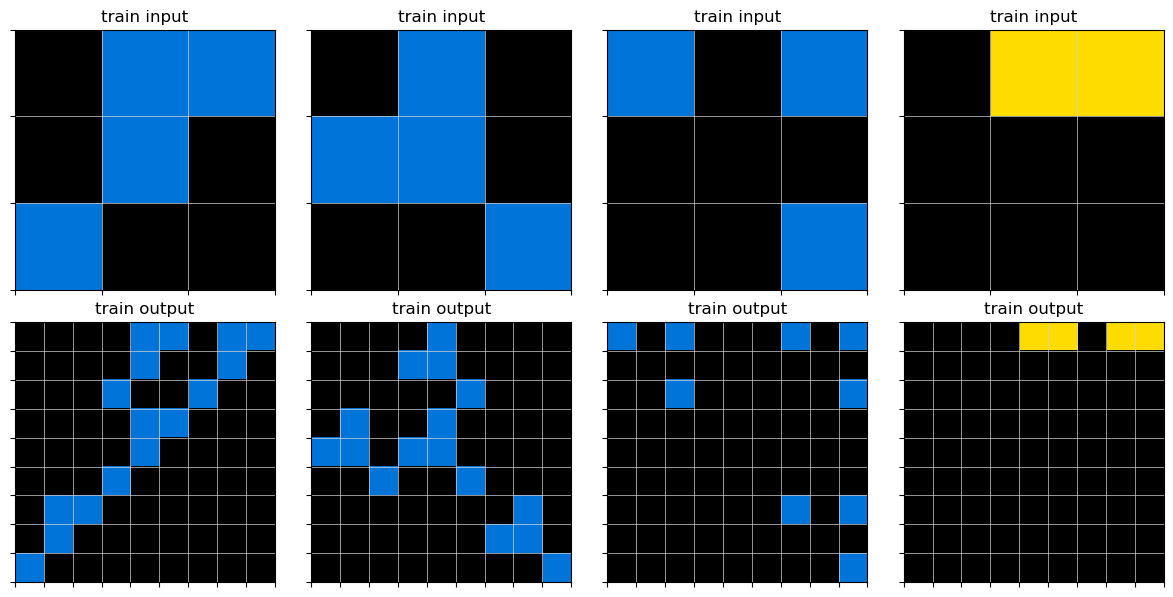

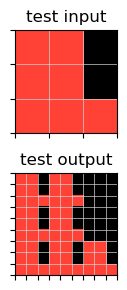

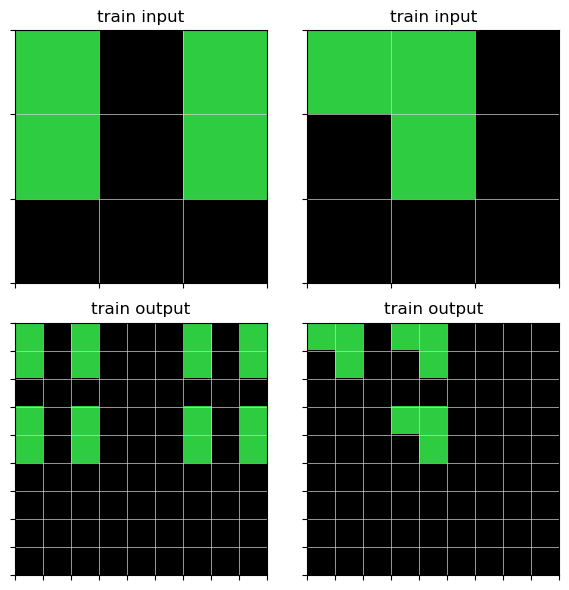

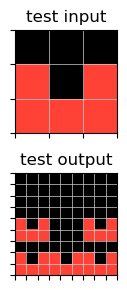

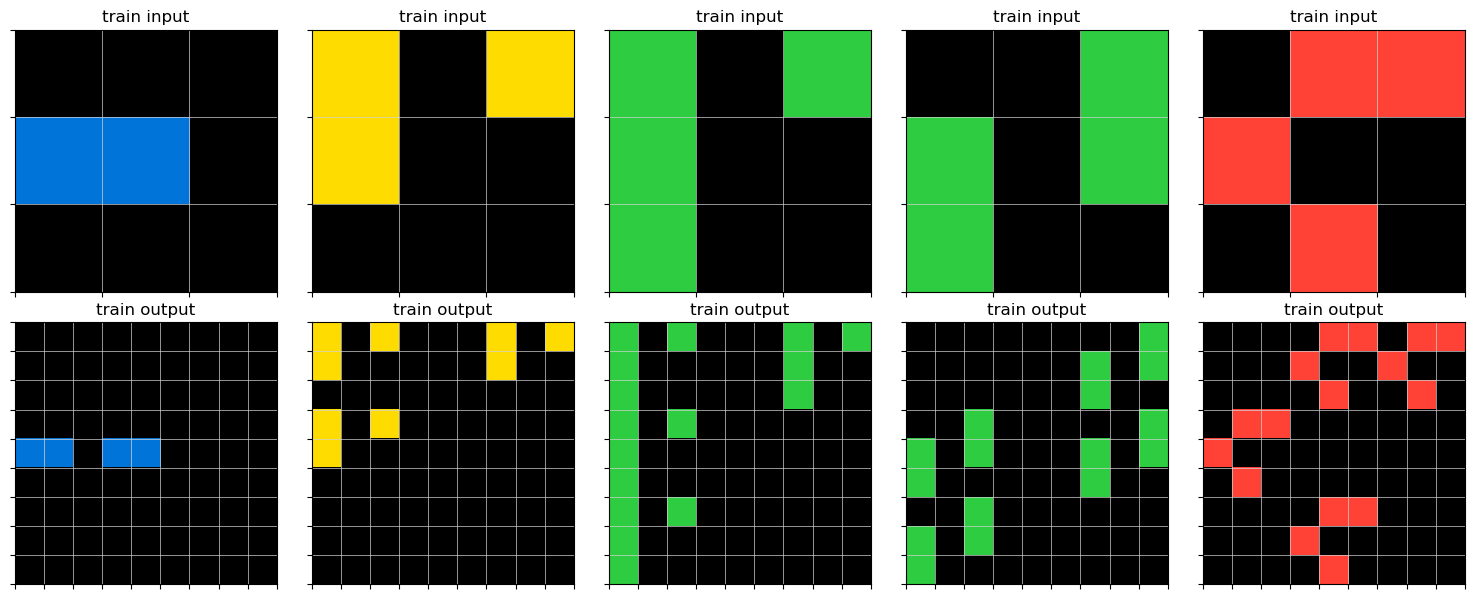

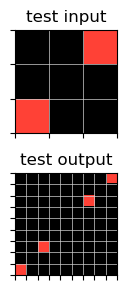

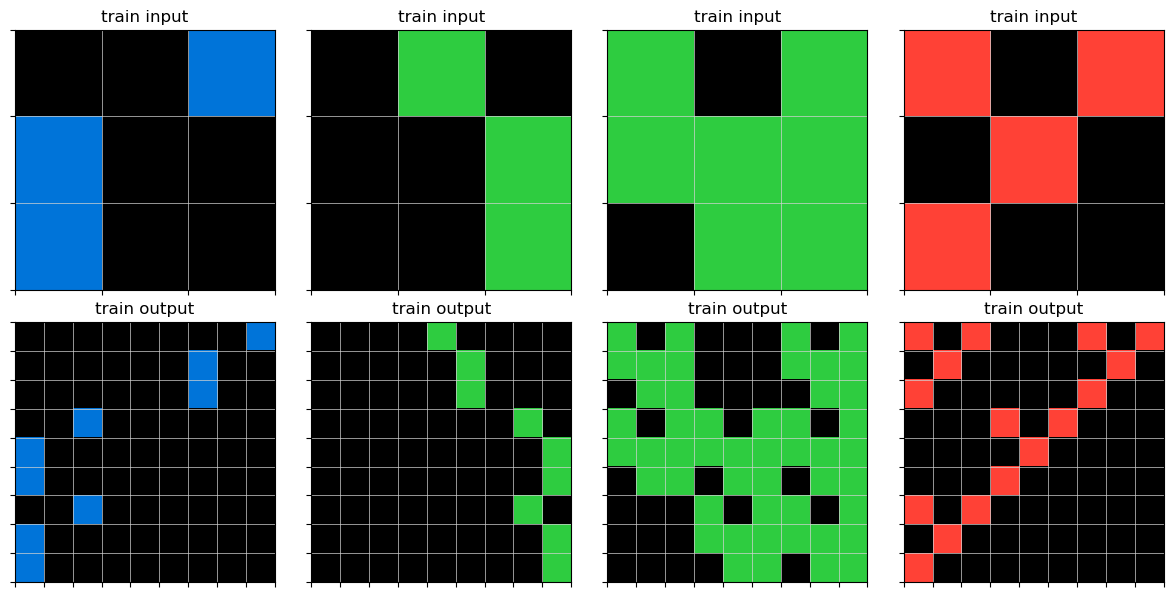

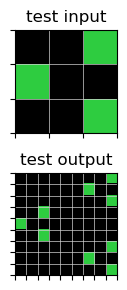

Generating dataset for generator function:  generate_full_riddle_27a28665


Generating dataset: 100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


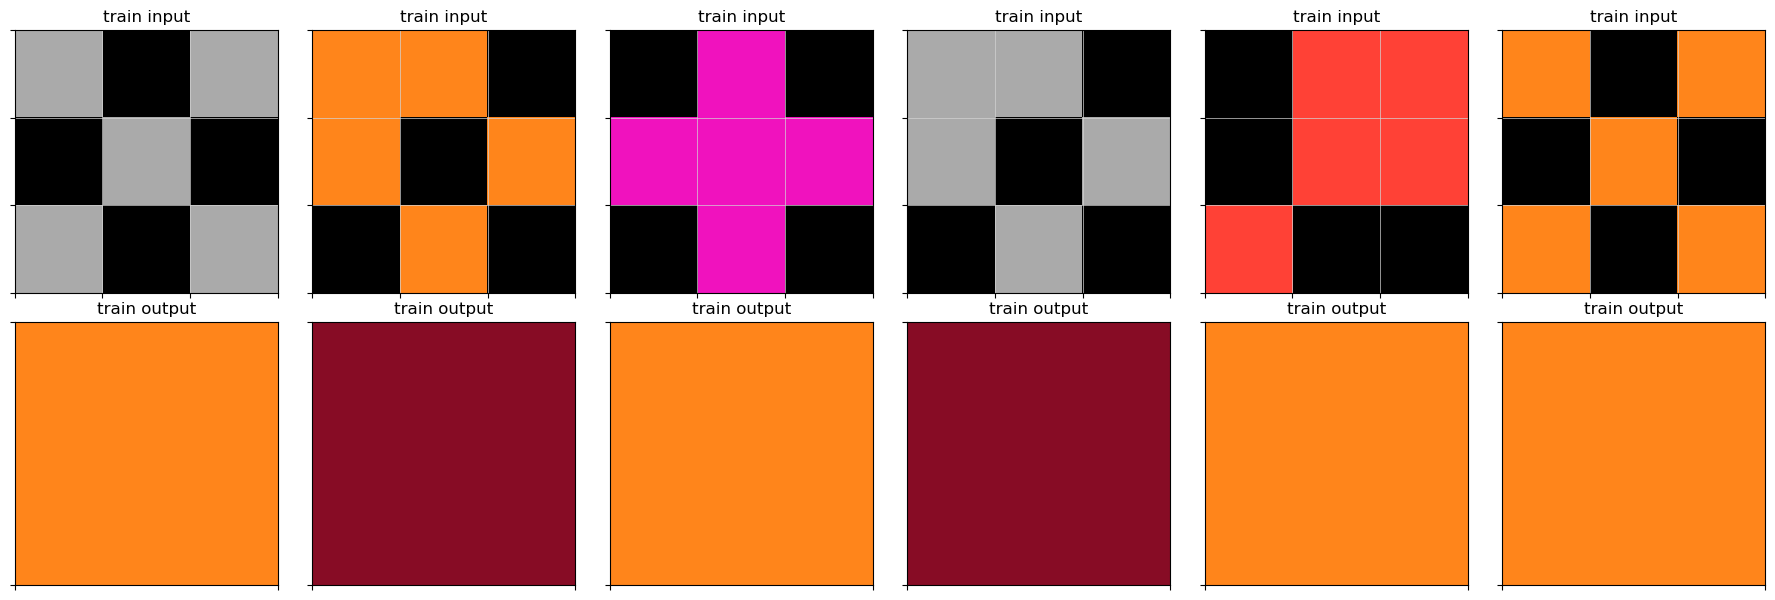

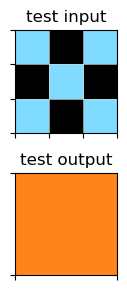

Generating dataset:  20%|██        | 2/10 [00:01<00:04,  1.92it/s]

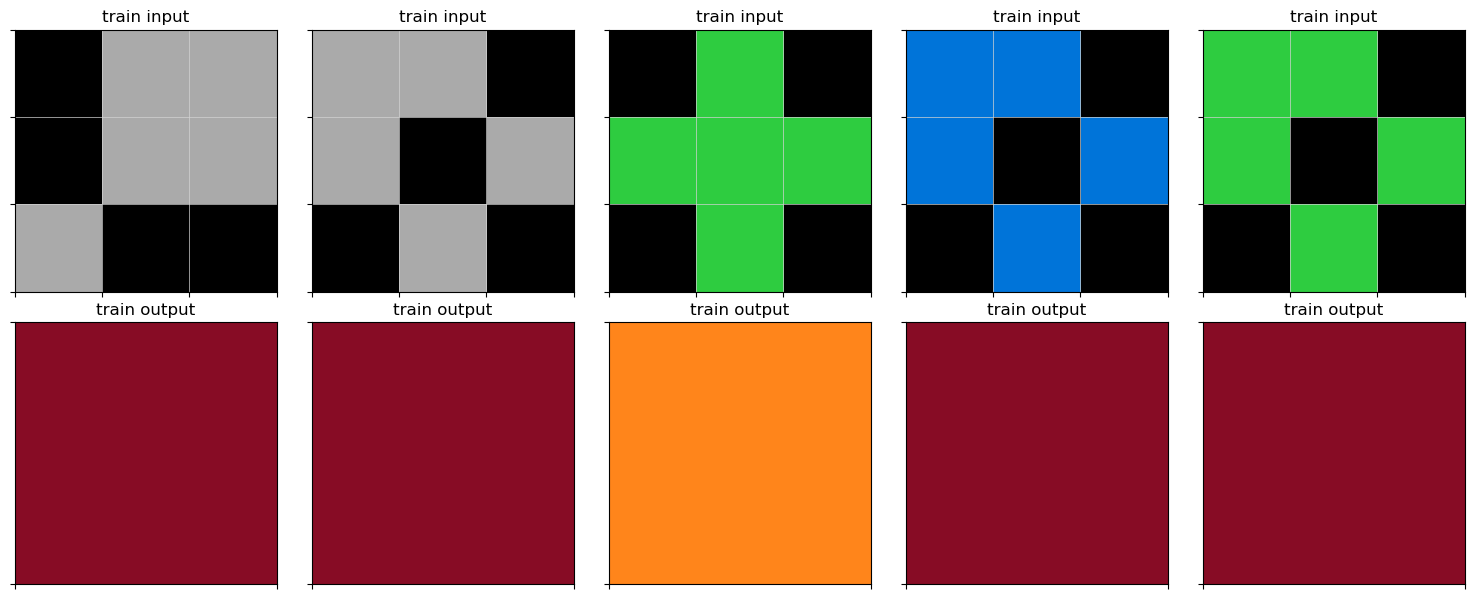

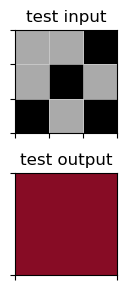

Generating dataset:  30%|███       | 3/10 [00:02<00:04,  1.40it/s]

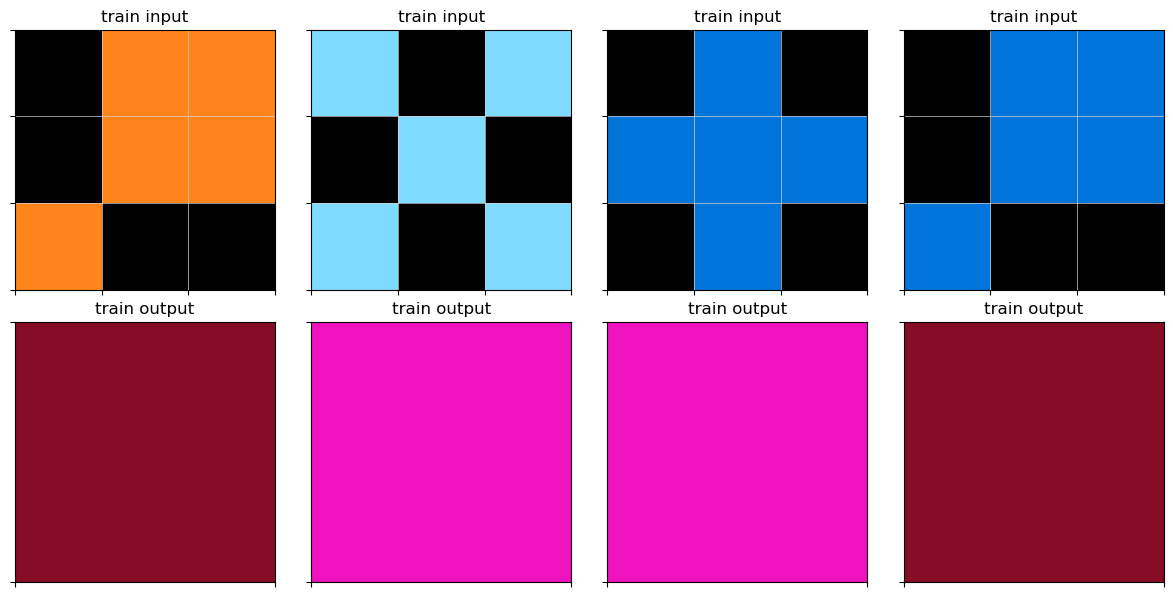

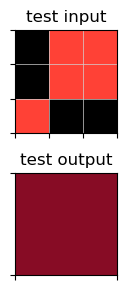

Generating dataset:  40%|████      | 4/10 [00:02<00:04,  1.49it/s]

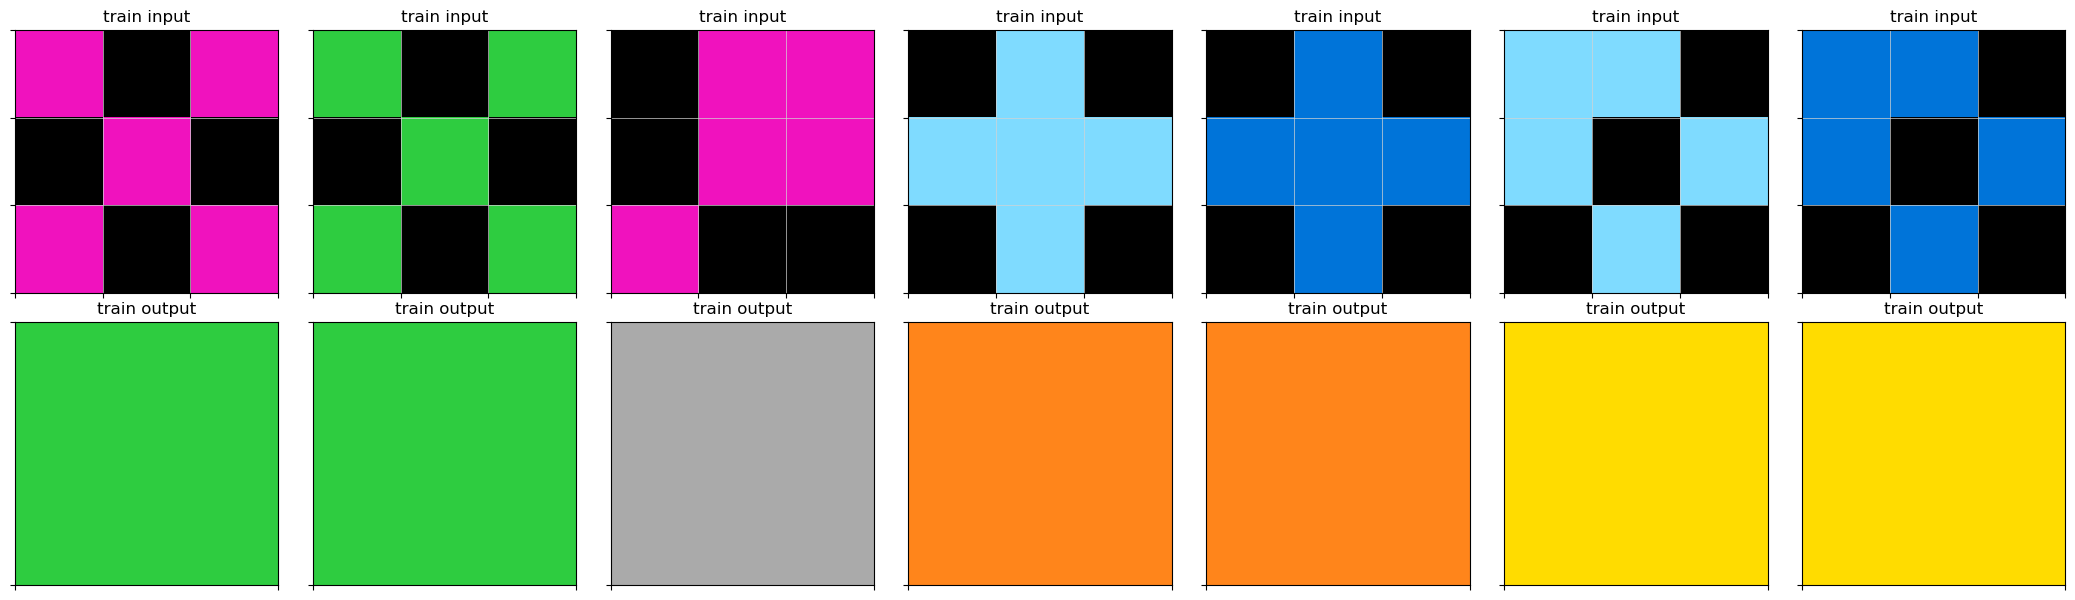

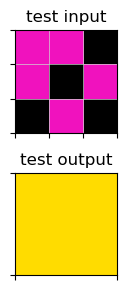

Generating dataset:  50%|█████     | 5/10 [00:03<00:04,  1.23it/s]

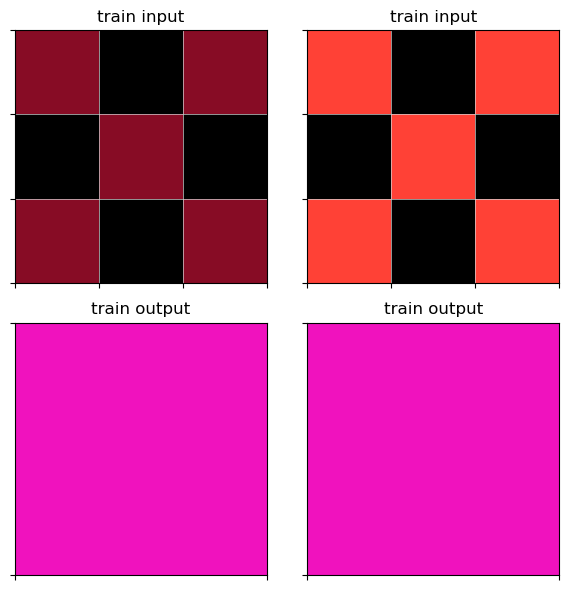

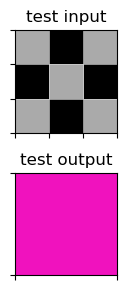

Generating dataset:  60%|██████    | 6/10 [00:04<00:02,  1.45it/s]

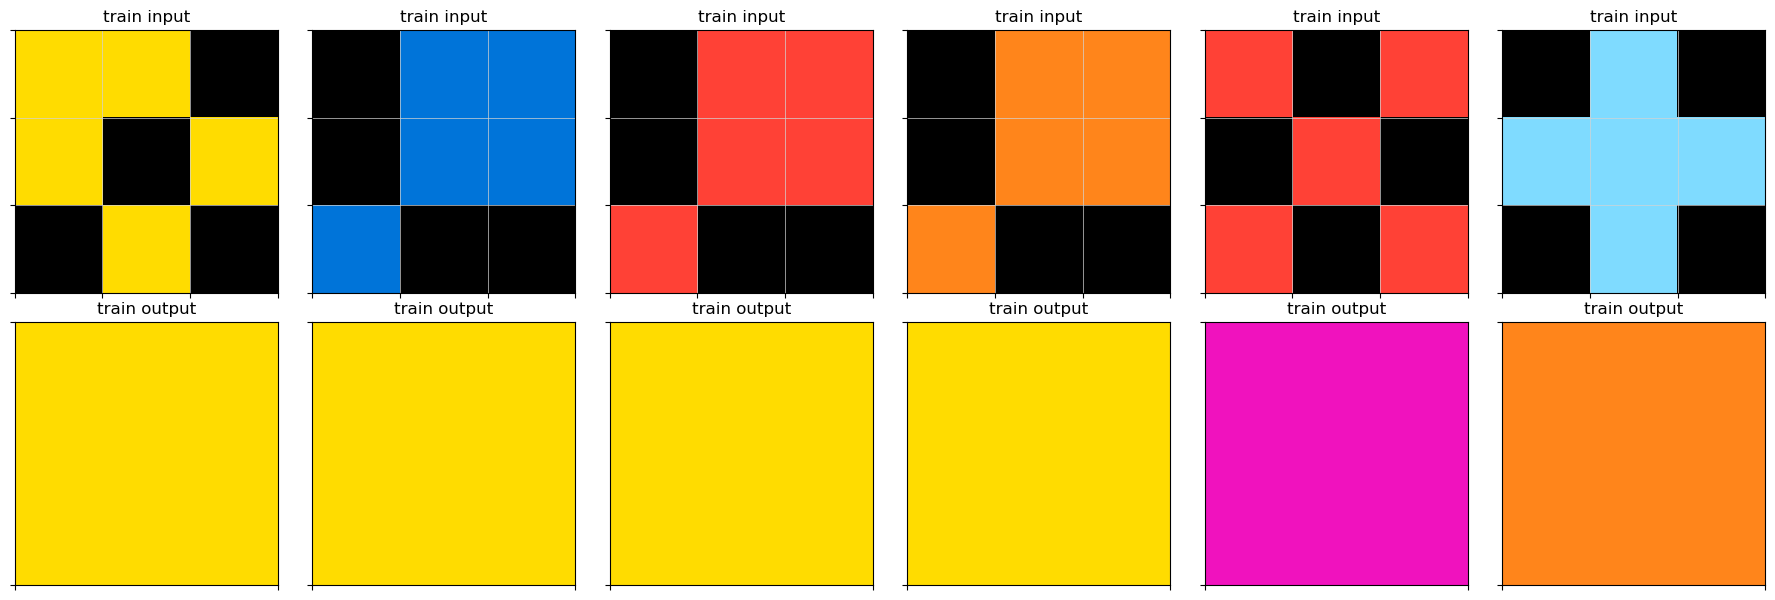

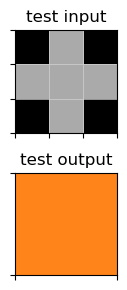

Generating dataset:  70%|███████   | 7/10 [00:05<00:02,  1.26it/s]

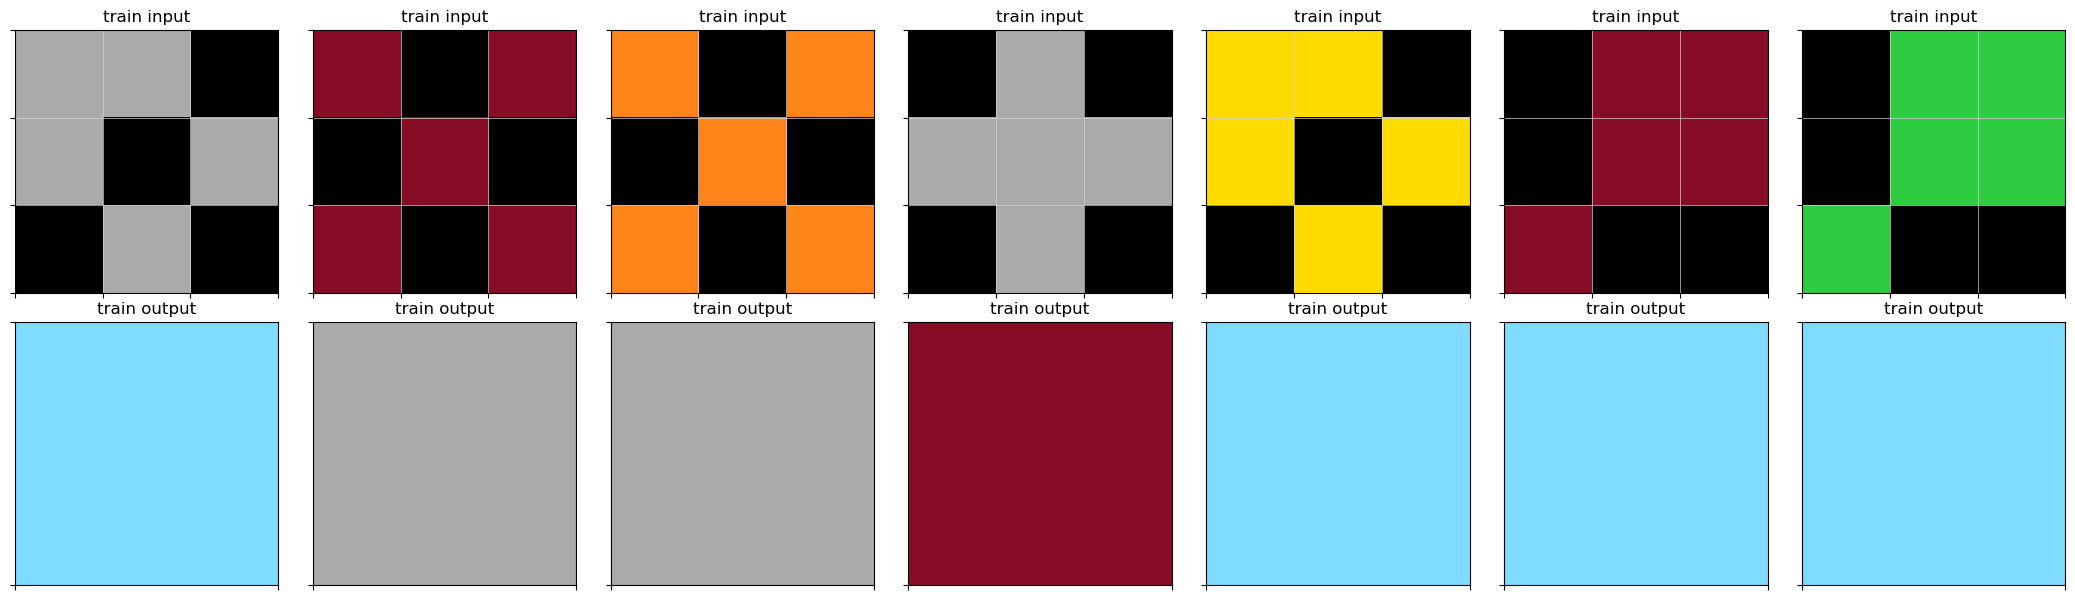

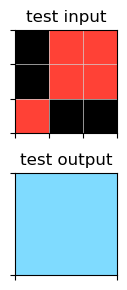

Generating dataset:  80%|████████  | 8/10 [00:06<00:01,  1.12it/s]

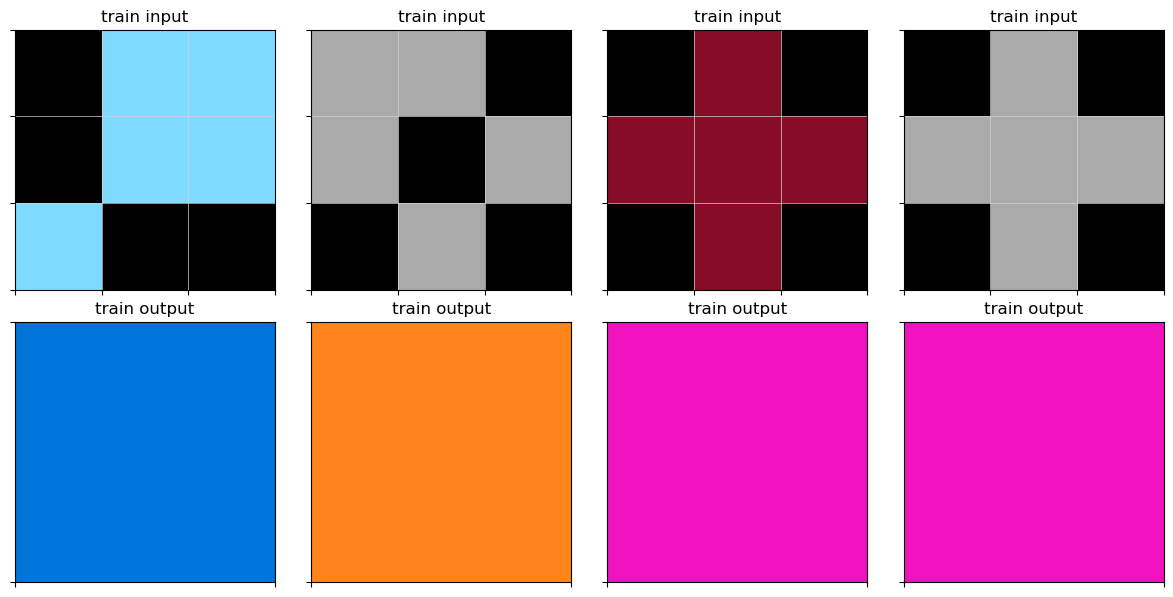

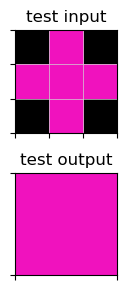

Generating dataset:  90%|█████████ | 9/10 [00:07<00:00,  1.18it/s]

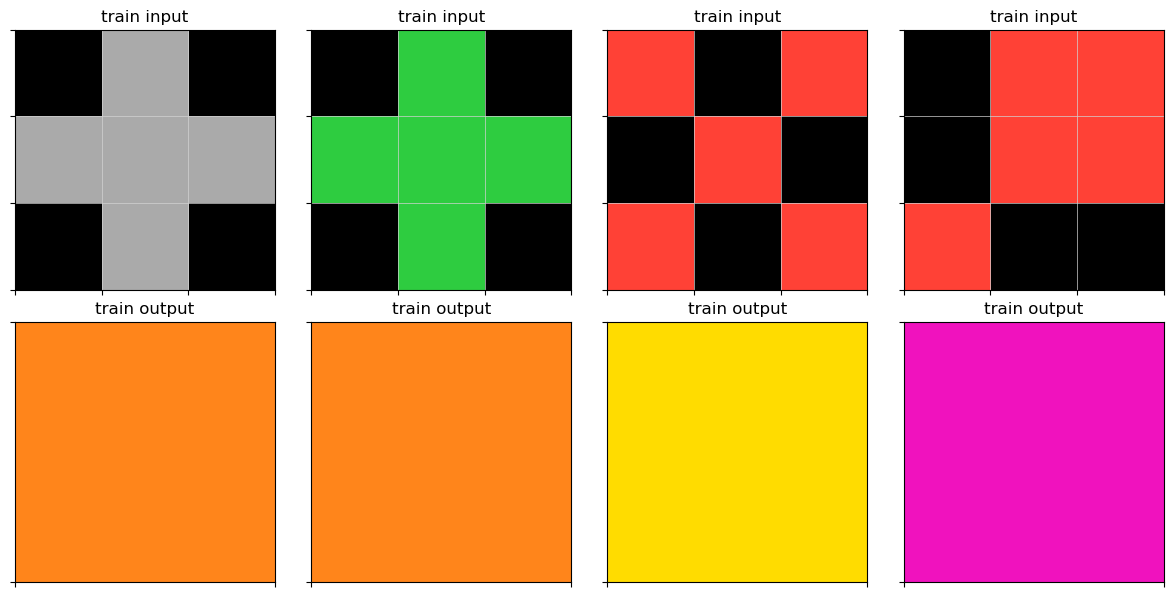

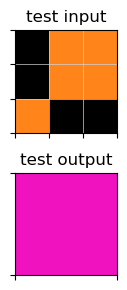

Generating dataset: 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

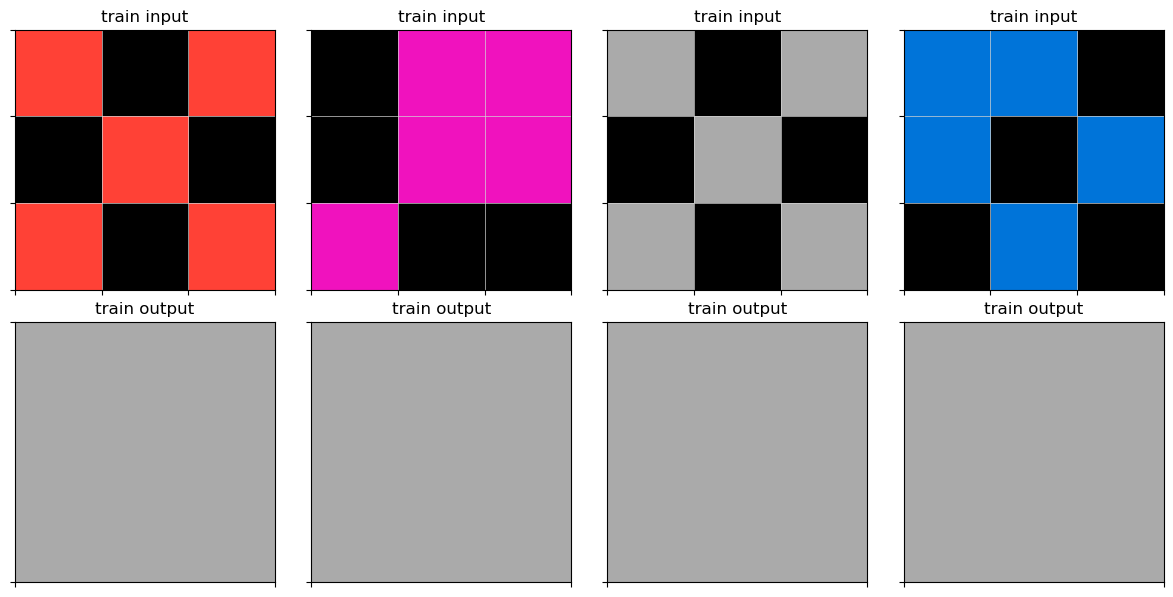

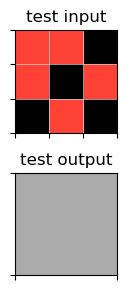

dataset generated


In [15]:
#adapted from Parapraxis dataset generation code

def gen_item_and_plot(plot = True):
    inp_board,out_board = generator_function()
    if generator_function.__name__=="generate_09c534e7":
        replace_color_with_new_color([inp_board,out_board])
    if plot:
        visualize_board(inp_board)
        visualize_board(out_board)
    return inp_board,out_board

def gen_train_items_and_plot(meta_trn_size = 1, plot = True):
    inp_out_pairs = []
    for i in range(meta_trn_size):
        inp_out_pairs.append(gen_item_and_plot(plot))
    return inp_out_pairs

def replace_color_with_new_color(io_pair):
    new_color=get_number_not_in_list(get_unique_numbers(io_pair))
    # replace 6 with the new color
    for boardnp in io_pair:
        boardnp[boardnp==6]=new_color
    return io_pair

# make subfolders for each riddle type
if make_sub_folders:
    for generator_function in generator_functions:
        riddle_name = generator_function.__name__
        riddle_folder = os.path.join(dataset_folder, riddle_name)
        if not os.path.exists(riddle_folder):
            os.makedirs(riddle_folder)
    for generator_function in full_riddle_generator_functions:
        riddle_name = generator_function.__name__
        riddle_folder = os.path.join(dataset_folder, riddle_name)
        if not os.path.exists(riddle_folder):
            os.makedirs(riddle_folder)

for generator_function in generator_functions:
    print('Generating dataset for generator function: ', generator_function.__name__)
    current_riddle_folder = os.path.join(dataset_folder, generator_function.__name__) if make_sub_folders else dataset_folder
    pbar = tqdm(total=dataset_size, desc='Generating dataset')
    plot_count = 0
    for n in range(dataset_size):
        pbar.update(1)
        if verbose:
            print("PUZZLE #"+str(n+1))
        train_pairs=gen_train_items_and_plot(np.random.randint(meta_trn_size_min,meta_trn_size_max+1), False)
        test_pairs=gen_train_items_and_plot(meta_tst_size, False)
        
        json_obj = {}
        json_obj['train'] = []
        json_obj['test'] = []
        # train
        for i in range(len(train_pairs)):
            a = {
                'input': train_pairs[i][0].tolist(),
                'output': train_pairs[i][1].tolist()
            }
            json_obj['train'].append(a)

        a = {'input': test_pairs[0][0].tolist(),
            'output': test_pairs[0][1].tolist()    }
        json_obj['test'].append(a)

        if plot_count < items_to_plot:
            plot_arc_json(json.dumps(json_obj))
            plot_count += 1

        # verify folder exists ./dungeon_dataset/
        if not os.path.exists(dataset_folder):
            os.makedirs(dataset_folder)
        #make a new filename that is 8 characters long and represents a random hex number
        # characters betwee 0-9 and a-f
        string = '0123456789abcdef'
        filename = ''.join(random.choice(string) for i in range(8)) +'_'+ generator_function.__name__+'.json'
        # write the json object to a file
        with open(os.path.join(current_riddle_folder, filename), 'w') as outfile:
            json.dump(json_obj, outfile)
    
        if verbose:
            print()
            print()

'''
Some riddles have multiple functions that relate to each other.  It is necessary to have a full function to generate the riddle.  -parapraxis
'''

for riddle_gen_function in full_riddle_generator_functions:
    print('Generating dataset for generator function: ', riddle_gen_function.__name__)
    current_riddle_folder = os.path.join(dataset_folder, riddle_gen_function.__name__) if make_sub_folders else dataset_folder
    pbar = tqdm(total=dataset_size, desc='Generating dataset')
    plot_count = 0
    for n in range(dataset_size):
        pbar.update(1)
        if verbose:
            print("PUZZLE #"+str(n+1))
        train_inp_boards, train_out_boards, test_inp_board, test_out_board=riddle_gen_function(random.randint(meta_trn_size_min,meta_trn_size_max))
        
        json_obj = {}
        json_obj['train'] = []
        json_obj['test'] = []
        # train
        for i in range(len(train_inp_boards)):
            a = {
                'input': train_inp_boards[i].tolist(),
                'output': train_out_boards[i].tolist()
            }
            json_obj['train'].append(a)

        a = {'input': test_inp_board.tolist(),
            'output': test_out_board.tolist()    }
        json_obj['test'].append(a)

        if plot_count < items_to_plot:
            plot_arc_json(json.dumps(json_obj))
            plot_count += 1

        # verify folder exists ./dungeon_dataset/
        if not os.path.exists(dataset_folder):
            os.makedirs(dataset_folder)
        #make a new filename that is 8 characters long and represents a random hex number
        # characters betwee 0-9 and a-f
        string = '0123456789abcdef'
        filename = ''.join(random.choice(string) for i in range(8)) +'_'+riddle_gen_function.__name__+ '.json'
        # write the json object to a file
        with open(os.path.join(current_riddle_folder, filename), 'w') as outfile:
            json.dump(json_obj, outfile)
        

        
        if verbose:
            print()
            print()

print('dataset generated')